In [ ]:
# All required libraries.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from custom_libs import helper
from importlib import reload
import numpy as np

In [ ]:
df = pd.read_csv('data/uci-heart-disease/processed.cleveland-cleansed.data')
# 303 records and 14 columns.
df.head(5)

In [ ]:
# From the data-dictionary, we can observe that only 'oldpeak' is in float format. Other data can be changed from float to int.
df['age'] = df['age'].astype('int')
df['sex'] = df['sex'].astype('int')
df['cp'] = df['cp'].astype('int')
df['trestbps'] = df['trestbps'].astype('int')
df['chol'] = df['chol'].astype('int')
df['fbs'] = df['fbs'].astype('int')
df['restecg'] = df['restecg'].astype('int')
df['thalach'] = df['thalach'].astype('int')
df['exang'] = df['exang'].astype('int')
df['slope'] = df['slope'].astype('int')
df['ca'] = df['ca'].astype('int')
df['thal'] = df['ca'].astype('int')

In [ ]:
df.head(5)

In [ ]:
df.describe().round(2)

In [ ]:
key = 'ca'
df[key].value_counts()

### Quantitative variables are analyzed for Gaussian distribution:
- age
- trestbps
- chol
- thalach
- oldpeak

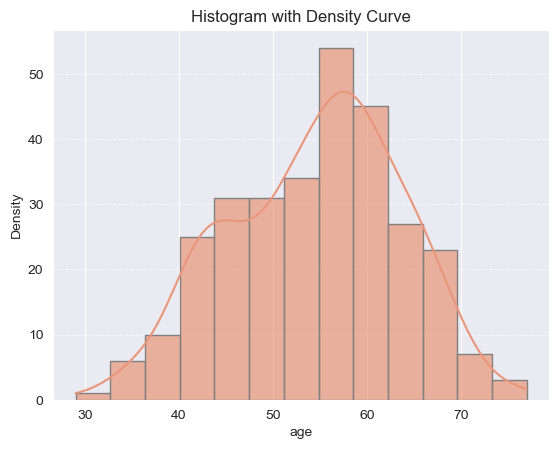

In [74]:
# Gaussian distribution is used to analyze quantitative data: age, trestbps, chol, thalach, oldpeak
key = 'age'
sns.histplot(df[key], kde=True, color='darksalmon', edgecolor='grey', alpha=0.7)
plt.title('Histogram with Density Curve')
plt.xlabel(key)
plt.ylabel('Density')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
X = df.drop('target', axis=1)
y = df['target']

## Normalization - data doesn't follow Gaussian distribution

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X)
normalized= scaler.transform(X)
normalized

In [ ]:
cols = df.columns.tolist()
cols.remove('target')
df2 = pd.DataFrame(normalized, columns=cols)
df2.head(5)

## Standardization - data follows Gaussian distribution

In [70]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
standardized = scaler.fit_transform(X)
standardized

array([[ 0.93618065,  0.69109474, -2.24062879, ...,  2.26414539,
        -0.72197605, -0.72197605],
       [ 1.3789285 ,  0.69109474,  0.87388018, ...,  0.6437811 ,
         2.47842525,  2.47842525],
       [ 1.3789285 ,  0.69109474,  0.87388018, ...,  0.6437811 ,
         1.41162482,  1.41162482],
       ...,
       [ 1.48961547,  0.69109474,  0.87388018, ...,  0.6437811 ,
         1.41162482,  1.41162482],
       [ 0.27205887,  0.69109474,  0.87388018, ...,  0.6437811 ,
         0.34482438,  0.34482438],
       [ 0.27205887, -1.44697961, -1.20245913, ...,  0.6437811 ,
         0.34482438,  0.34482438]])

In [71]:
cols = df.columns.tolist()
cols.remove('target')
df2 = pd.DataFrame(standardized, columns=cols)
df2.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.936181,0.691095,-2.240629,0.750380,-0.276443,2.430427,1.010199,0.017494,-0.696419,1.068965,2.264145,-0.721976,-0.721976
1,1.378929,0.691095,0.873880,1.596266,0.744555,-0.411450,1.010199,-1.816334,1.435916,0.381773,0.643781,2.478425,2.478425
2,1.378929,0.691095,0.873880,-0.659431,-0.353500,-0.411450,1.010199,-0.899420,1.435916,1.326662,0.643781,1.411625,1.411625
3,-1.941680,0.691095,-0.164289,-0.095506,0.051047,-0.411450,-1.003419,1.633010,-0.696419,2.099753,2.264145,-0.721976,-0.721976
4,-1.498933,-1.446980,-1.202459,-0.095506,-0.835103,-0.411450,1.010199,0.978071,-0.696419,0.295874,-0.976583,-0.721976,-0.721976


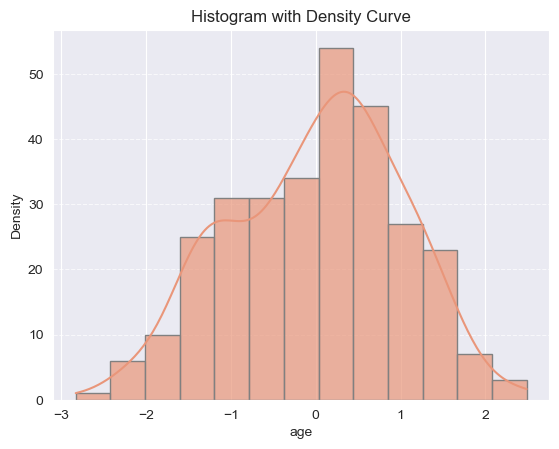

In [73]:
key = 'age'
sns.histplot(df2[key], kde=True, color='darksalmon', edgecolor='grey', alpha=0.7)
plt.title('Histogram with Density Curve')
plt.xlabel(key)
plt.ylabel('Density')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()